In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
df.select_dtypes(include='object').nunique()

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
class                   2
dtype: int64

# Exploratory Data Analysis

In [4]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

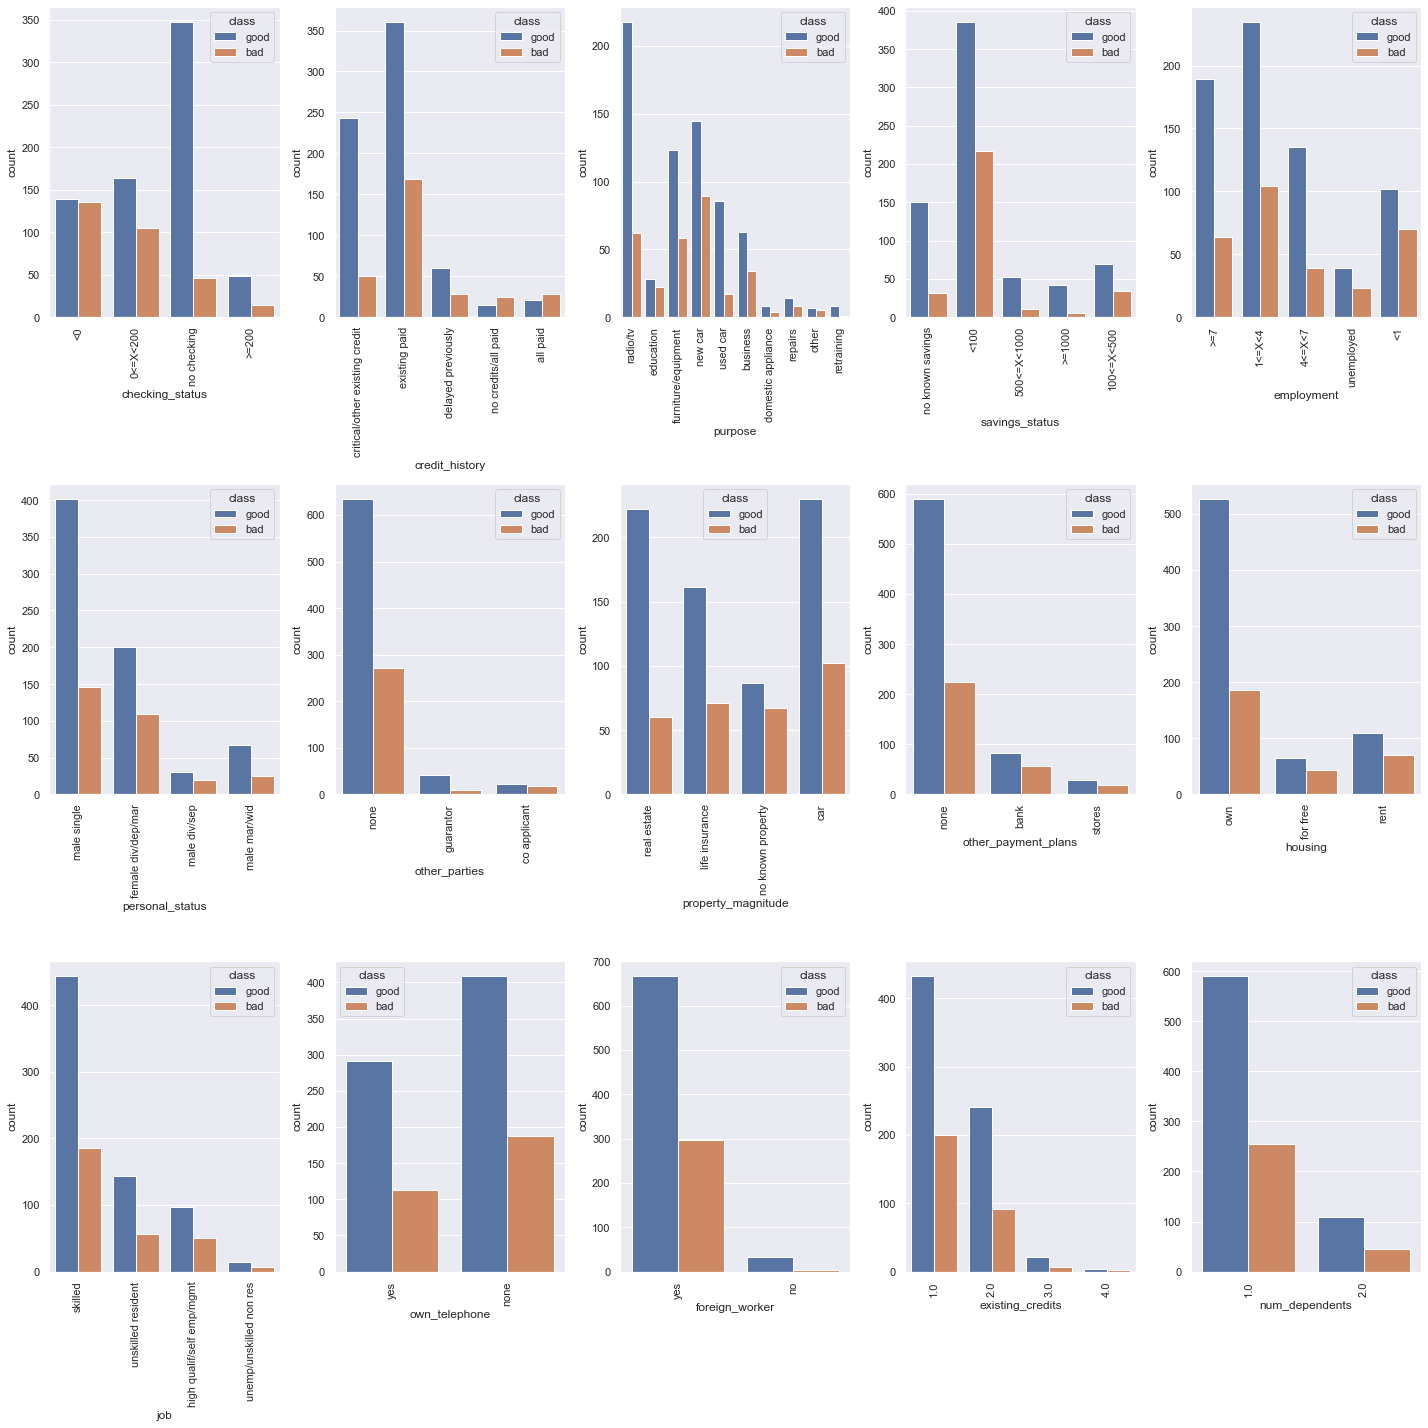

In [5]:
# list of categorical variables to plot
cat_vars = ['checking_status', 'credit_history','purpose', 'savings_status', 'employment',
            'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 
            'job', 'own_telephone', 'foreign_worker','existing_credits','num_dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='class', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

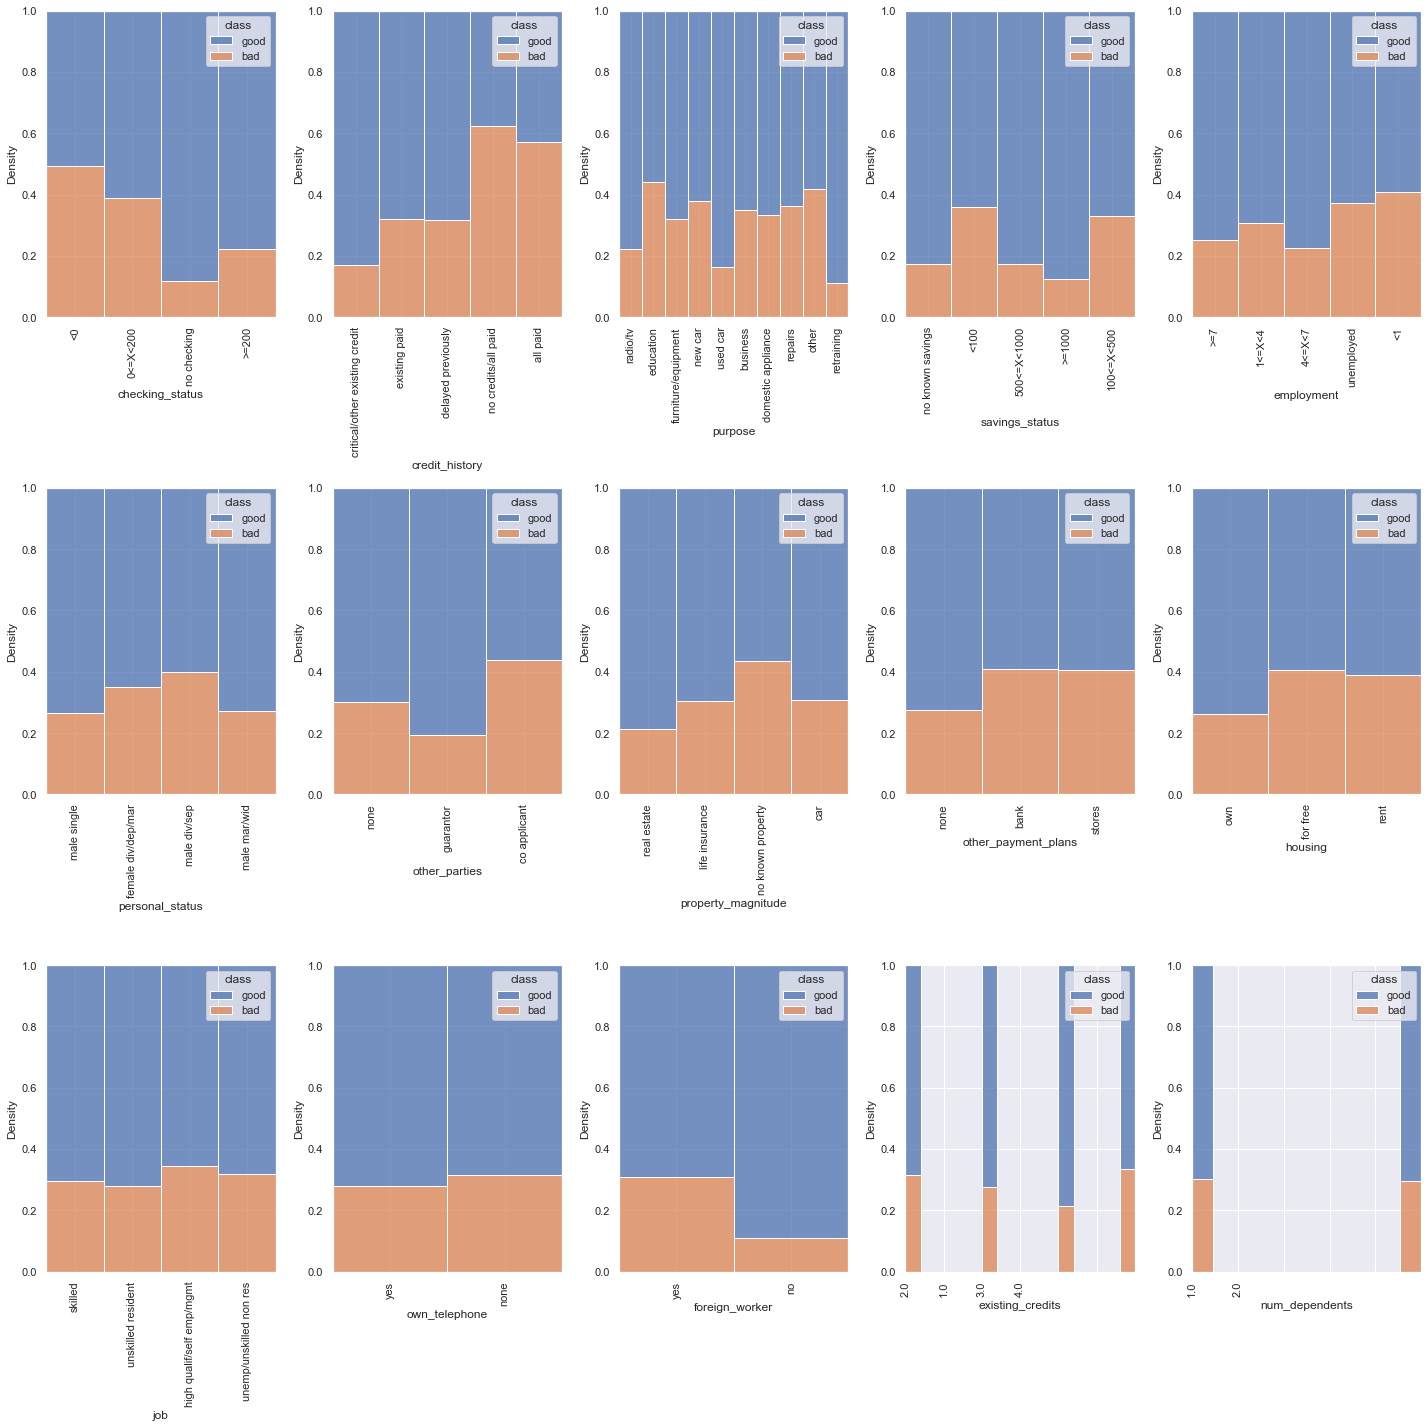

In [6]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['checking_status', 'credit_history','purpose', 'savings_status', 'employment',
            'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 
            'job', 'own_telephone', 'foreign_worker','existing_credits','num_dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

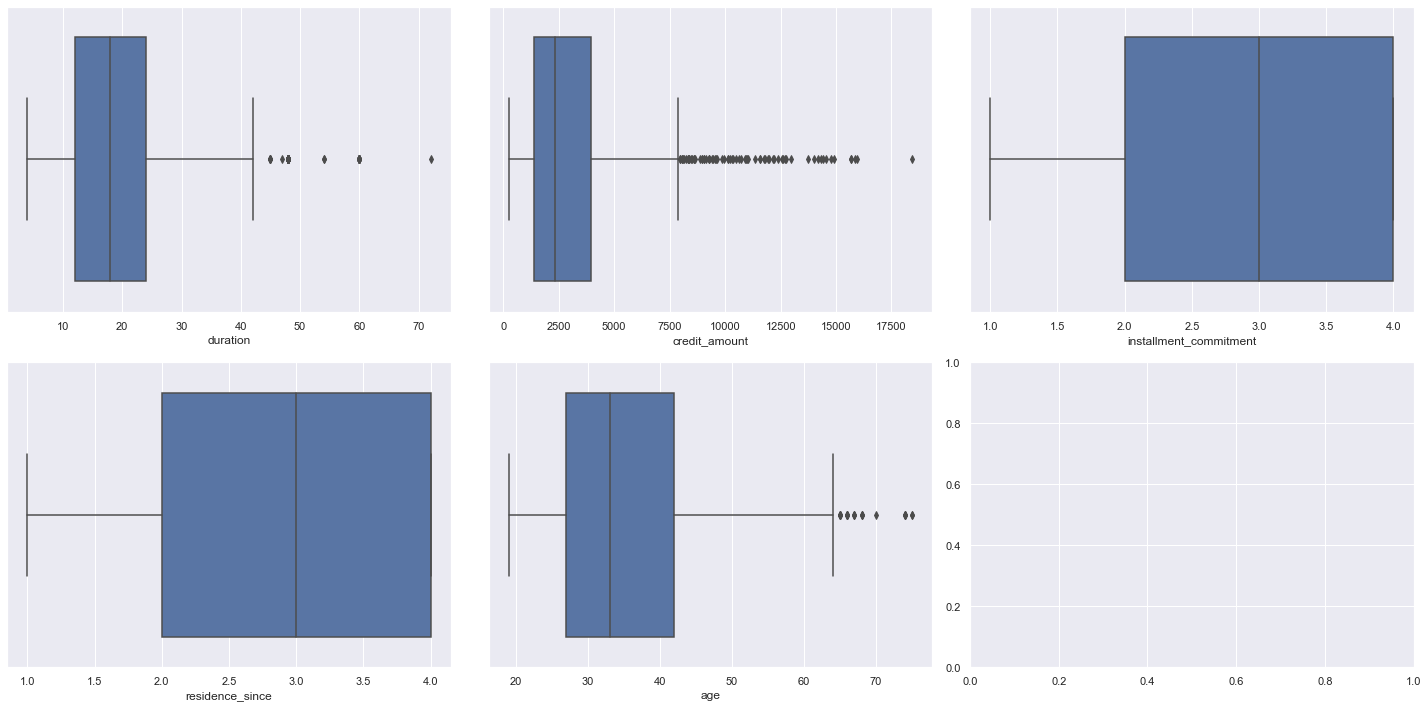

In [7]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

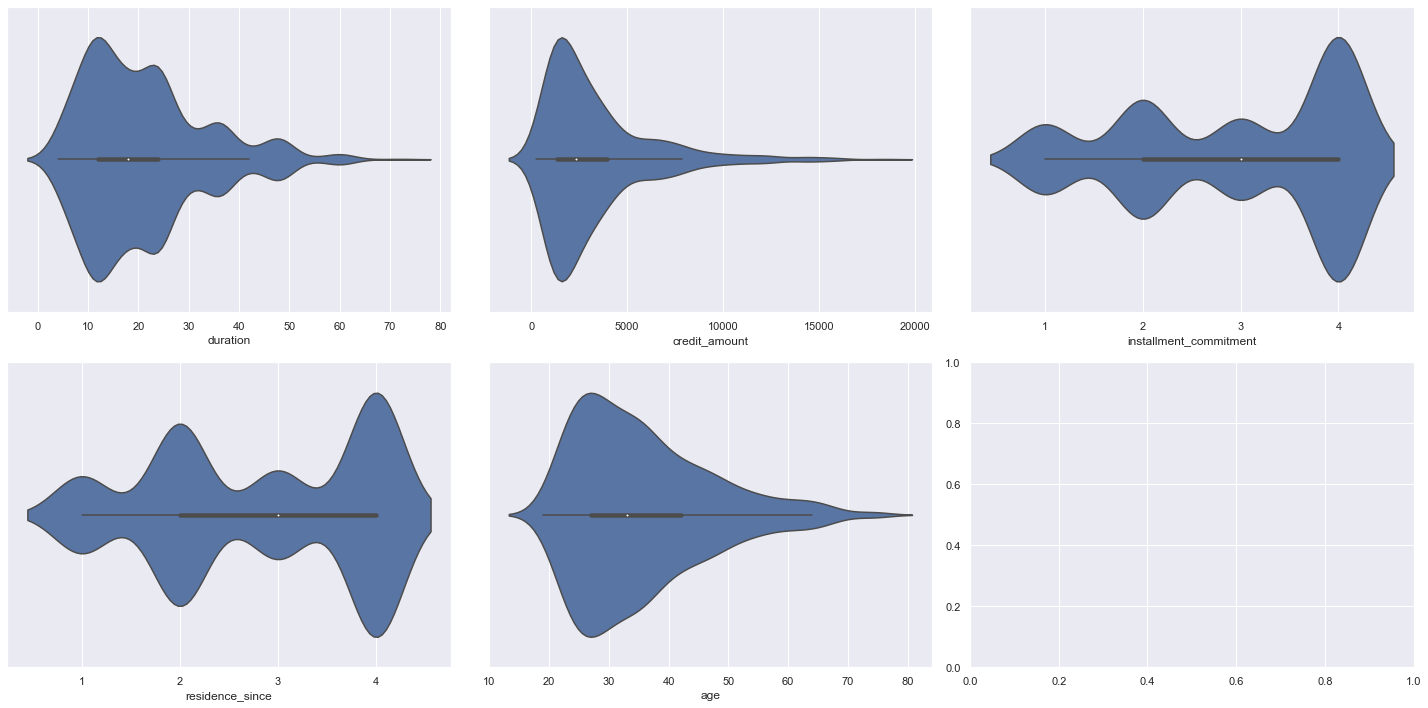

In [8]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

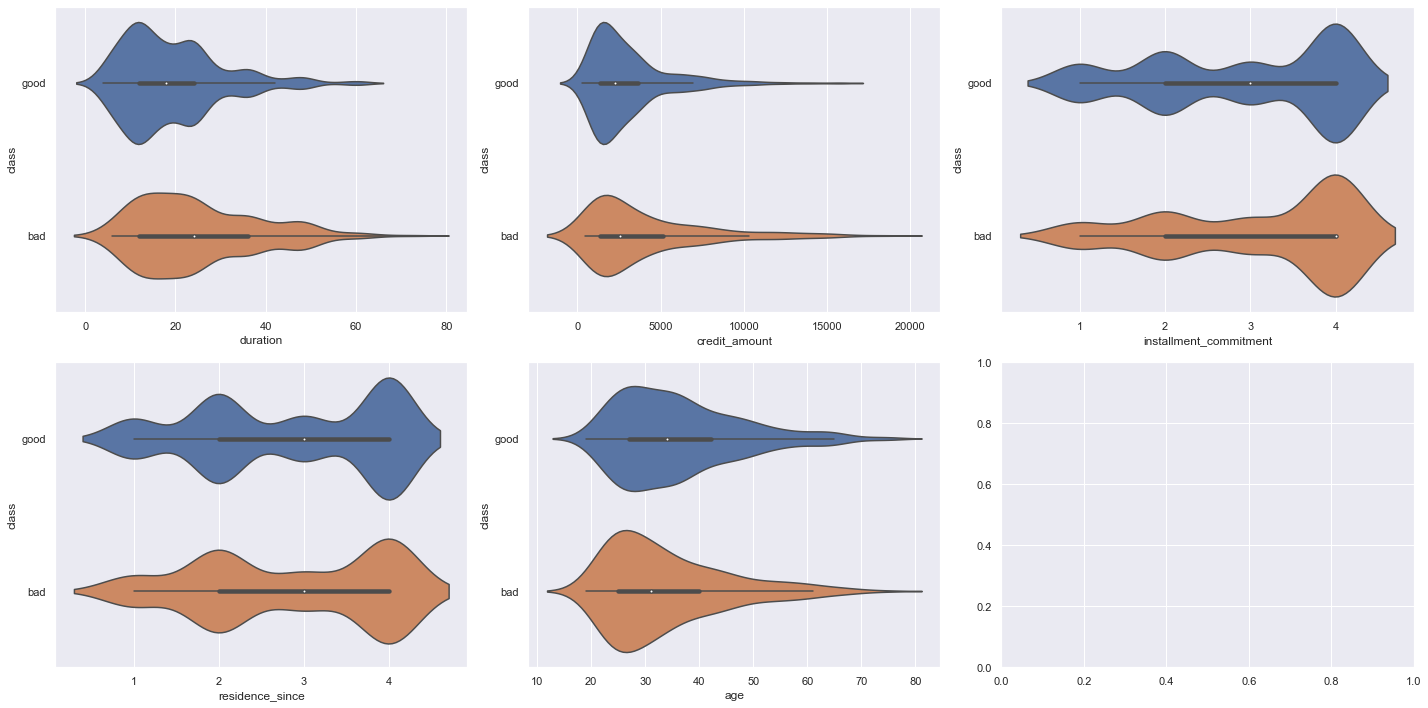

In [9]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='class', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

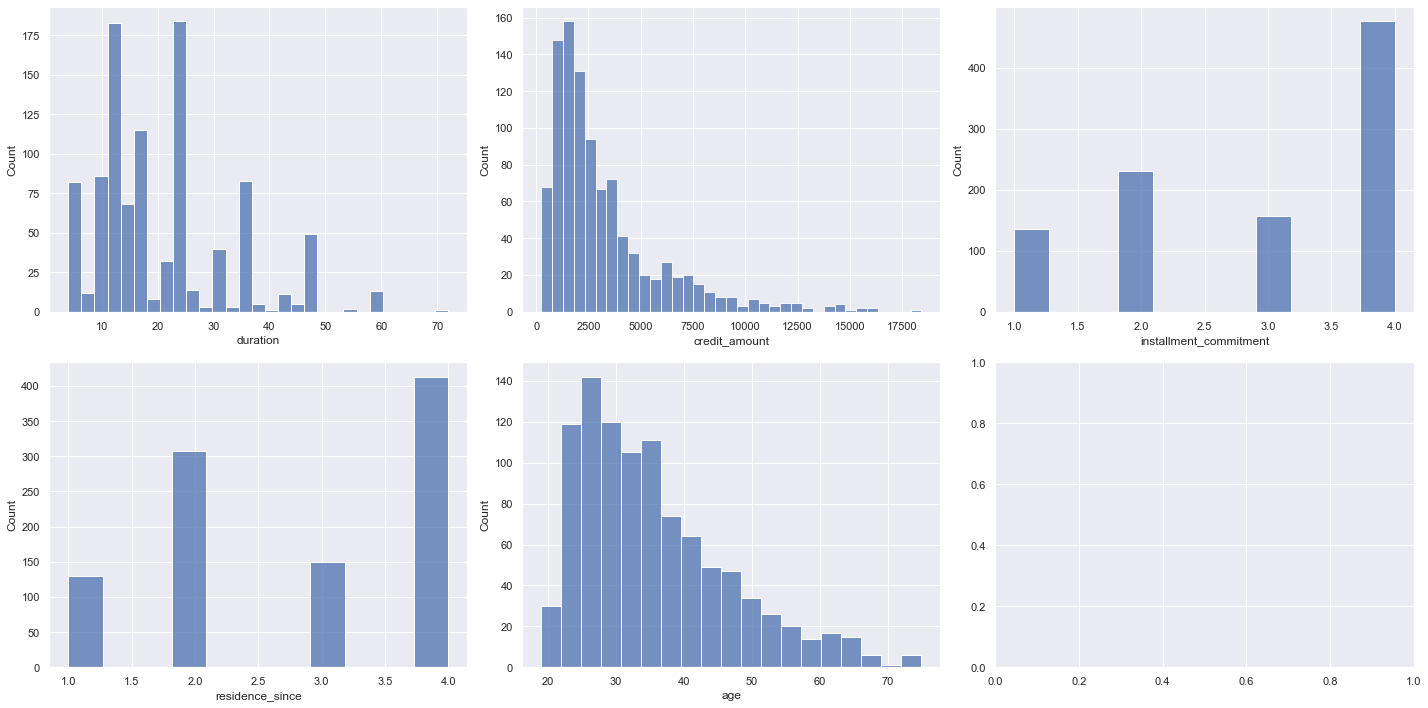

In [10]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

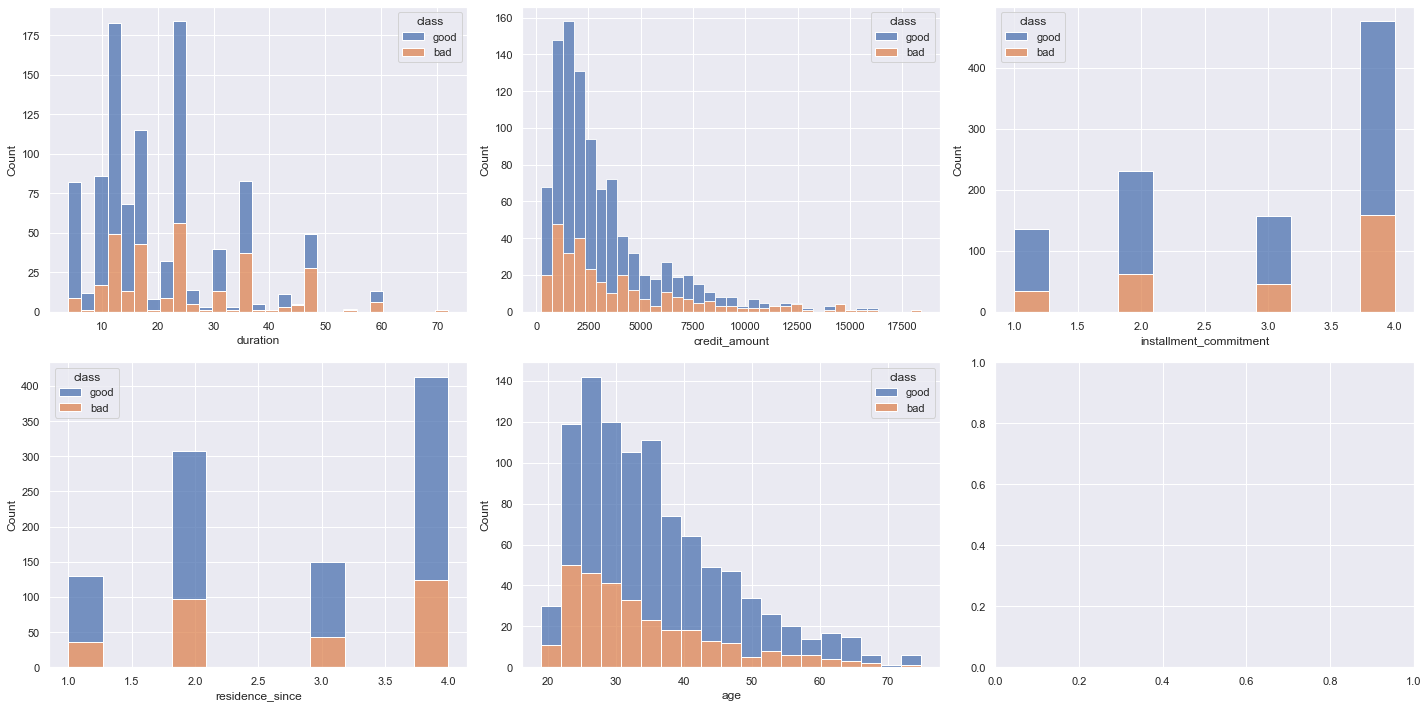

In [11]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()

# Data Preprocessing

In [12]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [13]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

checking_status: ['<0' '0<=X<200' 'no checking' '>=200']
credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties: ['none' 'guarantor' 'co applicant']
property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']
other_payment_plans: ['none' 'bank' 'stores']
housing: ['own' 'for free' 'rent']
job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone: ['yes' 'none']
foreign_worker: ['yes' 'no']
class: ['good' 'bad']


In [14]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

checking_status: [1 0 3 2]
credit_history: [1 3 2 4 0]
purpose: [6 2 3 4 9 0 1 7 5 8]
savings_status: [4 2 1 3 0]
employment: [3 0 1 4 2]
personal_status: [3 0 1 2]
other_parties: [2 1 0]
property_magnitude: [3 1 2 0]
other_payment_plans: [1 0 2]
housing: [1 0 2]
job: [1 3 0 2]
own_telephone: [1 0]
foreign_worker: [1 0]
class: [1 0]


# Balance the Class Label

1    700
0    300
Name: class, dtype: int64

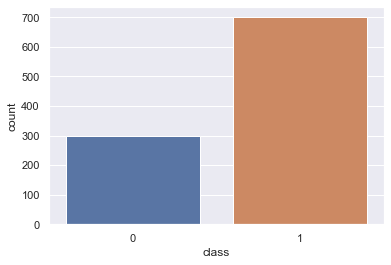

In [15]:
sns.countplot(df['class'])
df['class'].value_counts()

In [16]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['class']==1)] 
df_minority = df[(df['class']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 700, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    700
1    700
Name: class, dtype: int64

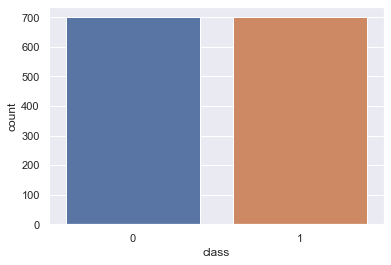

In [17]:
sns.countplot(df_upsampled['class'])
df_upsampled['class'].value_counts()

# Remove the Outlier using Z-Score because the Outlier is not extreme

In [18]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df_upsampled, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df_upsampled[col]))
        # remove rows with z-score greater than threshold in selected column
        df_upsampled = df_upsampled[(z < threshold) | (df_upsampled[col].isnull())]
    return df_upsampled

In [19]:
selected_cols = ['duration', 'credit_amount', 'age']
df_clean = remove_outliers(df_upsampled, selected_cols)
df_clean.shape

(1340, 21)

<AxesSubplot:>

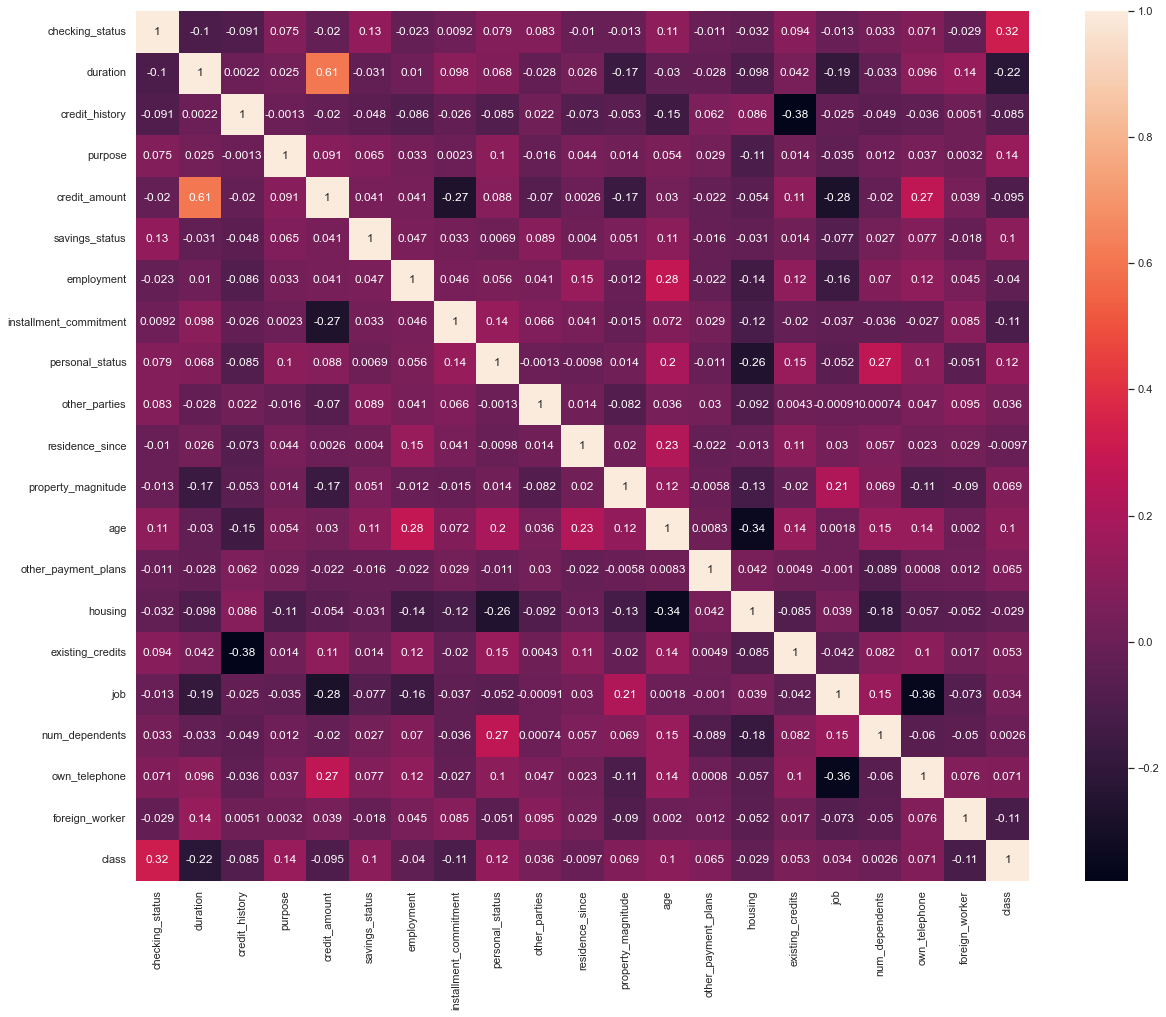

In [20]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Build Machine Learning Model with Hyperparameter Tuning

In [21]:
X = df_clean.drop('class', axis=1)
y = df_clean['class']

In [22]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [25]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 74.63 %


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.746268656716418
Precision Score :  0.746268656716418
Recall Score :  0.746268656716418
Jaccard Score :  0.5952380952380952
Log Loss :  8.763656653654484


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', random_state=0)

In [30]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.43 %


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8843283582089553
Precision Score :  0.8843283582089553
Recall Score :  0.8843283582089553
Jaccard Score :  0.7926421404682275
Log Loss :  3.9951838232056085


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=0)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'penalty': 'l1', 'solver': 'liblinear'}


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [35]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 73.88 %


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7388059701492538
Precision Score :  0.7388059701492538
Recall Score :  0.7388059701492538
Jaccard Score :  0.5857988165680473
Log Loss :  9.02142661773808


# Confusion Matrix

In [37]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.746268656716418')

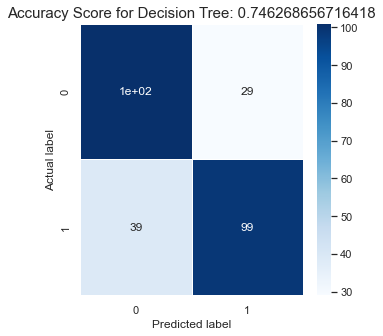

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [39]:
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8843283582089553')

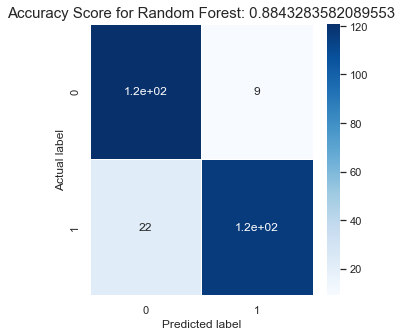

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [41]:
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.7388059701492538')

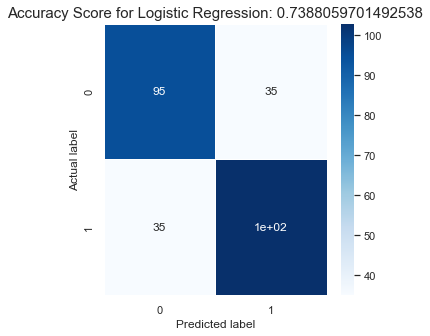

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# ROC AUC Curve


# Decision Tree

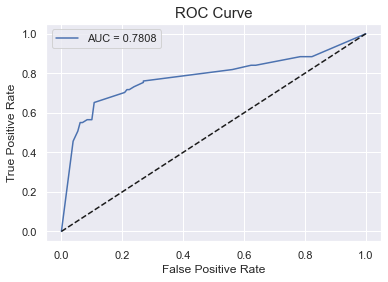

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

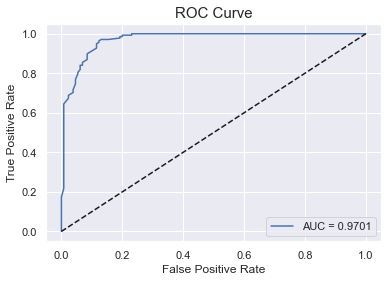

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Logistic Regression

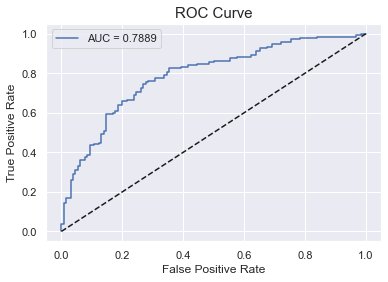

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Feature Importances

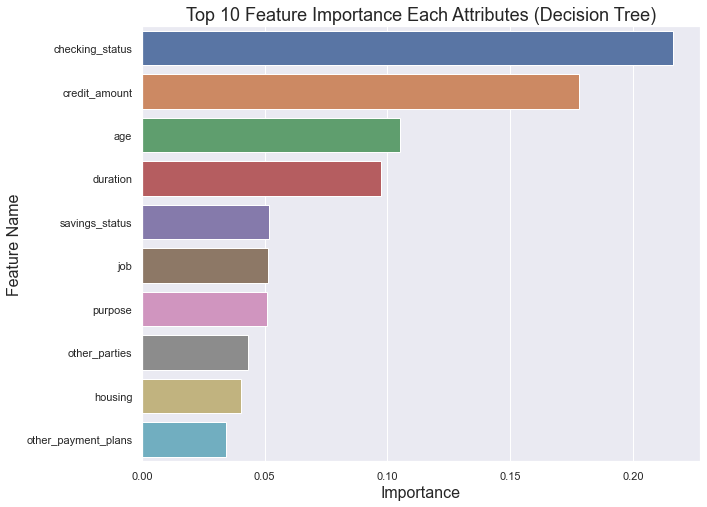

In [46]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

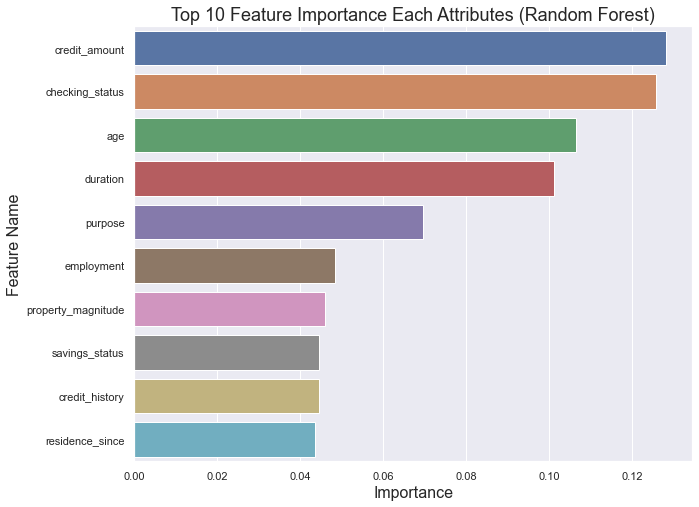

In [47]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()